In [1]:
import pandas as pd
import json
from pprint import pprint
from PIL import Image
import scipy
from scipy.misc import imread
import requests
import io
import pylab
import os
from tqdm import tqdm

In [13]:
train = json.load(open('data/train.json'))

In [14]:
train_list = list(train.items())

In [15]:
urls, annotations = train_list[1][1], train_list[2][1]

In [16]:
data_dict = {}
for entry in urls:
    data_dict[entry['imageId']] = {'url' : entry['url']}

In [17]:
for entry in annotations:
    _id = entry['imageId']
    data_dict[_id]['labelId'] = entry['labelId']

In [18]:
with open('data/reformatted_train.json','w') as f:
    json.dump(data_dict,f)

In [2]:
with open('data/reformatted_train.json','r') as f:
    data_dict = json.load(f)

In [3]:
len(data_dict)

1014544

In [4]:
def get_and_save_image(url,filepath):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    img.save(filepath)
             
def get_image_and_label(image_id):
    url = data_dict[image_id]['url']
    labels = data_dict[image_id]['labelId']
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img,labels

In [29]:
i = Image.open('data/initial_images/1.jpg')

In [5]:
len(os.listdir('data/initial_images/'))

83672

In [6]:
numbers = [str(x) for x in range(len(os.listdir('data/initial_images/')),len(data_dict))]

In [ ]:
for num in tqdm(numbers):
    img, labels = get_image_and_label(num)
    img.save('data/initial_images/{}.jpg'.format(num))

  0%|          | 2744/930872 [12:39<71:21:09,  3.61it/s]

In [19]:
from keras.preprocessing import image

In [35]:
x = image.load_img('data/initial_images/1.jpg',grayscale=False,target_size=(224,224,3))

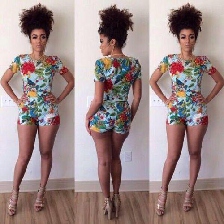

In [6]:
import os

In [38]:
len(os.listdir('data/initial_images'))

32222

In [27]:
!ls

data  EDA_GETTING_DATA.ipynb  README.md  Simple_Model.ipynb


In [28]:
!ls data


initial_images		   test.json	   validation.json
reformatted_train.json	   test.json.zip   validation.json.zip
sample_submission.csv	   train.json
sample_submission.csv.zip  train.json.zip


In [29]:
!du -sh data/initial_images/

724M	data/initial_images/


In [32]:
1014000/20000


50.7

In [34]:
x = 50.7 * 724 

In [35]:
x/1000

36.7068